### **Introducción**

El presente informe analiza el flujo de recursos destinados a los giros directos de **Capitación** y **Evento** realizados en los últimos 13 meses. Estos giros representan un mecanismo clave para financiar el acceso a servicios de salud a través de entidades prestadoras (EPS) y proveedores de servicios (IPS). El análisis tiene como objetivo identificar tendencias, patrones y posibles áreas de mejora en la distribución de recursos, proporcionando información estratégica para la toma de decisiones.

En este informe, se presentan tanto análisis combinados como separados de los giros directos de **Capitación** y **Evento**, considerando aspectos clave como:
- La distribución total de recursos entre diferentes EPS e IPS.
- La evolución mensual de los giros en el tiempo.
- La distribución geográfica de los recursos, a nivel de departamentos y municipios.
- Comparaciones entre los tipos de contratación (Capitación y Evento) para evaluar el balance en la asignación de recursos.

Además, se incluye un apartado sobre la calidad de los datos, identificando valores faltantes o inconsistencias que puedan impactar los resultados del análisis.

El propósito final es proporcionar una visión integral que permita a las partes interesadas tomar decisiones informadas en la asignación de recursos y en el diseño de estrategias futuras para garantizar un uso eficiente y equitativo de los fondos disponibles.


In [121]:
import sqlite3
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [92]:
# URL del endpoint
url = "http://127.0.0.1:8000/api/"

### **Análisis General (Mixto)**

En esta sección se presenta un análisis combinado de los giros directos de **Capitación** y **Evento**, resaltando tendencias generales, patrones en la asignación de recursos y la evolución temporal de los giros. Este enfoque busca proporcionar una visión integral que combine ambos tipos de contratación.

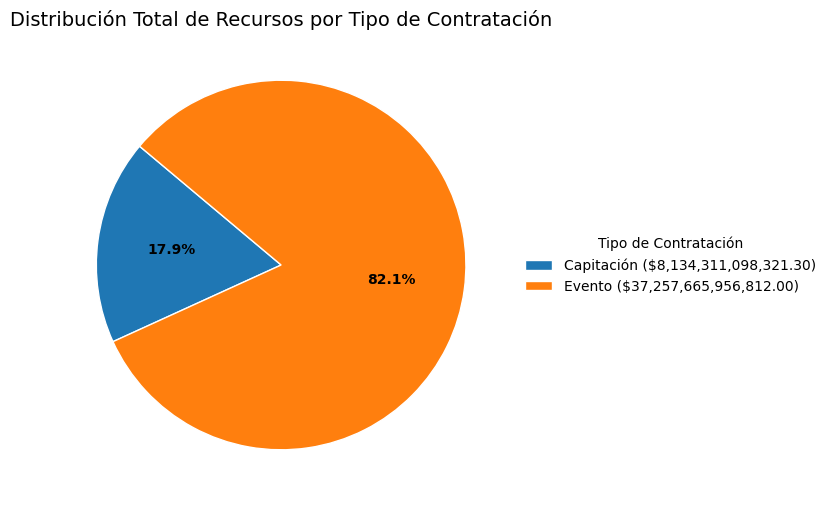

In [93]:
# Define el endpoint específico
endpoint = "distribucion-tipo-contratacion"

# Realiza la solicitud al endpoint
response = requests.get(url + endpoint)
data = response.json()

# Procesa los datos
labels = [item["tipo_contratacion"] for item in data]
sizes = [item["total_giro"] for item in data]
colors = plt.cm.tab10(range(len(labels)))  # Colores personalizados para cada segmento

# Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,  # Las etiquetas estarán en la leyenda
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    wedgeprops=dict(edgecolor="w"),  # Bordes blancos para contraste
)

# Añadir la leyenda con valores
ax.legend(
    wedges,
    [f"{label} (${value:,.2f})" for label, value in zip(labels, sizes)],
    title="Tipo de Contratación",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    frameon=False,
)

# Estilo del texto
plt.setp(autotexts, size=10, weight="bold")
ax.set_title("Distribución Total de Recursos por Tipo de Contratación", fontsize=14)
plt.show()


#### **Análisis del Gráfico**

La mayor parte de los recursos (**82.1%**) se destinan a la contratación por **Evento**, mientras que el **17.9%** corresponde a **Capitación**. Esto refleja una tendencia clara en la destinación de recursos.



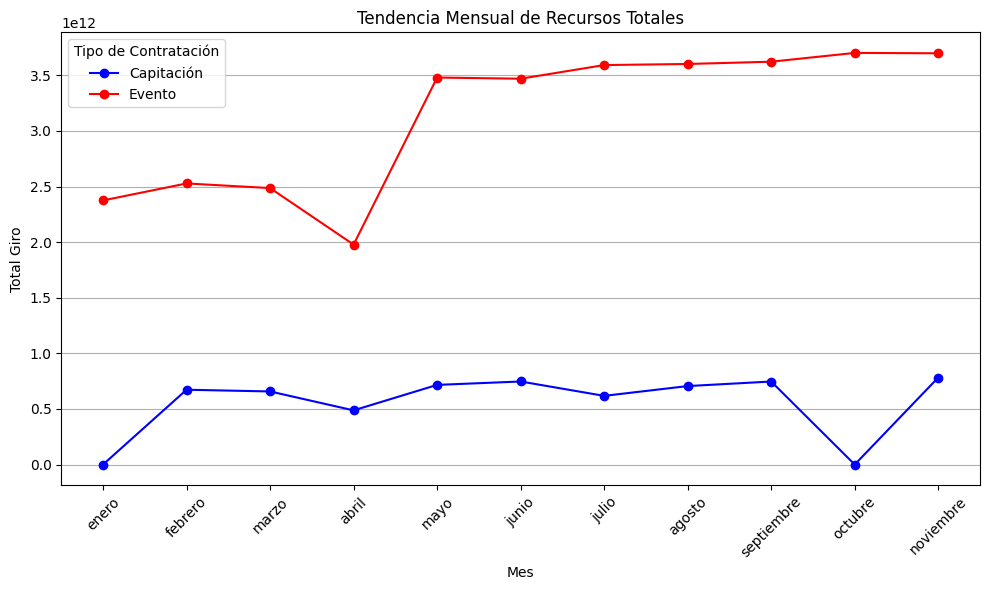

In [94]:
import requests
import matplotlib.pyplot as plt

# URL del endpoint
url = "http://127.0.0.1:8000/api/tendencia-mensual"

# Realiza la solicitud al endpoint
response = requests.get(url)

# Procesa los datos
data = response.json()

# Ordena los meses
meses = sorted(set([item["mes"] for item in data]), key=lambda x: [
    "enero", "febrero", "marzo", "abril", "mayo", "junio",
    "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"].index(x))

# Datos para graficar
giros_capitacion = []
giros_evento = []

for mes in meses:
    # Filtrar datos por mes
    mes_data = [item for item in data if item["mes"] == mes]

    # Filtrar giros para "Capitación" y "Evento"
    giro_capitacion = next((item["total_giro"] for item in mes_data if item["tipo_contratacion"] == "Capitación"), 0)
    giro_evento = next((item["total_giro"] for item in mes_data if item["tipo_contratacion"] == "Evento"), 0)

    giros_capitacion.append(giro_capitacion)
    giros_evento.append(giro_evento)

# Generación del gráfico
plt.figure(figsize=(10, 6))
plt.plot(meses, giros_capitacion, label="Capitación", marker='o', color="blue")
plt.plot(meses, giros_evento, label="Evento", marker='o', color="red")

plt.xlabel("Mes")
plt.ylabel("Total Giro")
plt.title("Tendencia Mensual de Recursos Totales")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Contratación")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### Análisis del Gráfico

- **Capitación (Azul)**: Los giros son estables, con pequeños aumentos en febrero y junio. El pico en abril es moderado.
- **Evento (Rojo)**: Muestra mayor variabilidad, con un gran aumento en abril, seguido de una leve caída, pero sigue siendo mayor que Capitacion.

**Insight**: El mes de **abril** presenta un aumento significativo en **Evento**, mientras que **Capitación** mantiene una tendencia estable, con un leve repunte.


### **Análisis Independientes**

En esta sección, se presentarán análisis detallados sobre diversos aspectos del flujo de recursos, centrándonos en las variaciones y tendencias por EPS, prestadores y contrataciones a lo largo del tiempo. Este análisis ayudará a identificar patrones relevantes y posibles áreas de mejora en la asignación de recursos.


### **Giros Directos de Capitación**

Este análisis se enfoca en los recursos asignados bajo la modalidad de "Capitación". Se presentarán las tendencias y variaciones mensuales, así como el comportamiento de los giros en comparación con otras modalidades, para identificar patrones clave en la asignación de recursos.


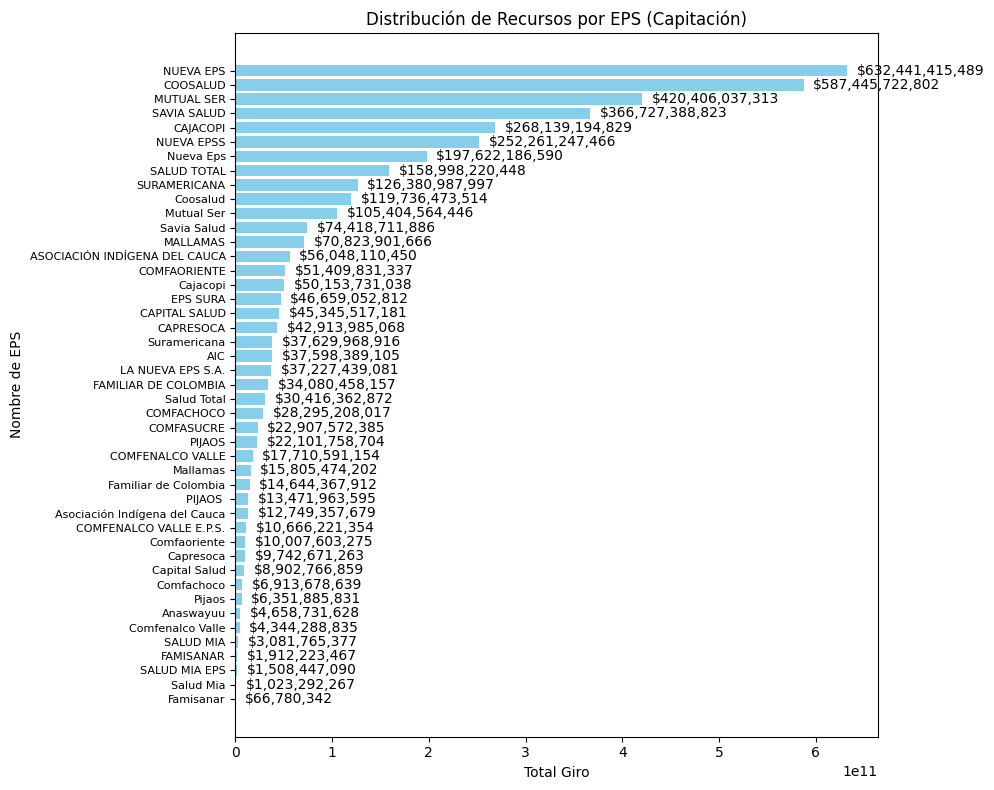

In [108]:
# URL del endpoint
url = "http://127.0.0.1:8000/api/distribucion-por-eps"

# Realiza la solicitud al endpoint
response = requests.get(url)

# Convertir la respuesta a JSON directamente
data = response.json()

# Filtrar datos donde 'nombre_eps' no sea None
valid_data = [item for item in data if item["nombre_eps"] is not None]

# Procesa los datos
eps_names = [item["nombre_eps"] for item in valid_data]
total_giro = [item["total_giro"] for item in valid_data]

# Ordenar los datos por total_giro de menor a mayor
sorted_data = sorted(zip(total_giro, eps_names), reverse=False)
total_giro_sorted, eps_names_sorted = zip(*sorted_data)

# Generación del gráfico de barras horizontales
plt.figure(figsize=(10, 8))
bars = plt.barh(eps_names_sorted, total_giro_sorted, color="skyblue")

# Añadir etiquetas con valores
for bar in bars:
    plt.text(
        bar.get_width() + 10000000000,  # Ajusta la posición del texto a la derecha de la barra
        bar.get_y() + bar.get_height() / 2,  # Centrar el texto verticalmente
        f"${bar.get_width():,.0f}",  # Formato de valor
        va="center", ha="left", color="black"
    )

plt.xlabel("Total Giro")
plt.ylabel("Nombre de EPS")
plt.title("Distribución de Recursos por EPS (Capitación)")

# Ajuste del tamaño de la fuente para los nombres de EPS
plt.yticks(fontsize=8)  # Reduce el tamaño de las etiquetas del eje Y (EPS)

# Rotar las etiquetas para mayor legibilidad
plt.tight_layout()
plt.show()


### **Interpretación del Gráfico: Distribución de Recursos por EPS (Capitación)**

El gráfico muestra que **NUEVA EPS** recibe la mayor parte de los recursos, con **$6.32 billones**. Otras EPS destacadas son **COOSALUD** y **MUTUAL SER** con montos cercanos a los **$5.87 billones** y **$4.20 billones**, respectivamente. Las EPS más pequeñas, como **FAMISANAR** y **SALUD MIA EPS**, reciben mucho menos. Este gráfico resalta las diferencias significativas en la distribución de los recursos entre las EPS.


### **Giros por Departamento y Municipio**

Este análisis tiene como objetivo mostrar cómo se distribuyen los recursos de giros directos por **departamento** y **municipio**, lo que permite identificar las zonas geográficas que reciben mayores recursos. El gráfico generado muestra los giros totales para cada municipio, con las mayores concentraciones de recursos en los municipios más destacados.


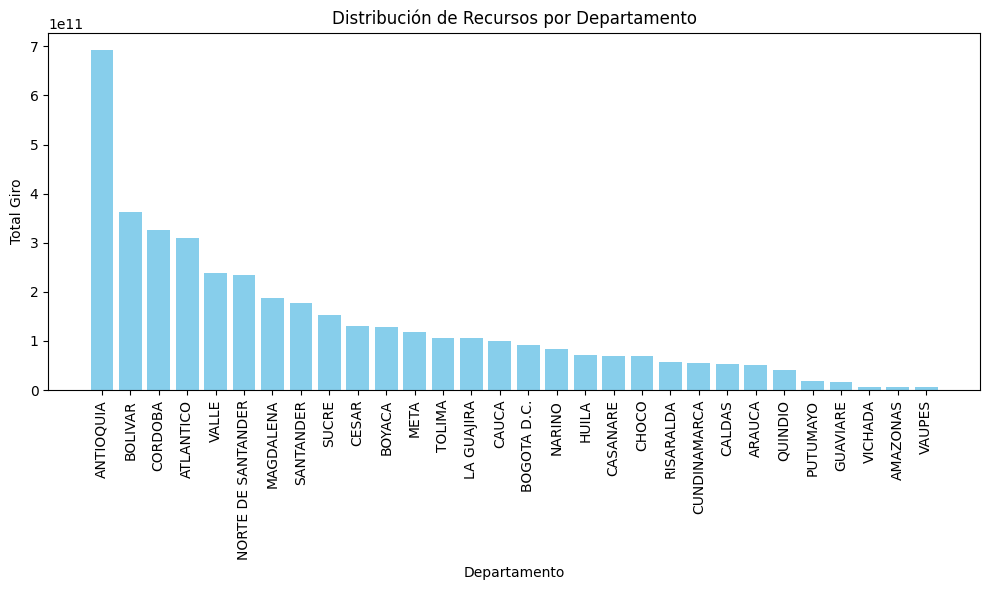

In [ ]:
# URL del endpoint
url = "http://127.0.0.1:8000/api/giros-por-departamento-y-municipio"

# Realiza la solicitud al endpoint
response = requests.get(url)

# Intenta convertir la respuesta a JSON
data = response.json()

# Filtrar datos donde 'departamento' no sea None
valid_data = [item for item in data if item["departamento"] is not None]

# Agrupar los datos por departamento y sumar los giros
depto_giros = defaultdict(float)  
for item in valid_data:
    depto_giros[item["departamento"]] += item["total_giro"]

# Ordenar los departamentos por total_giro
sorted_depto = sorted(depto_giros.items(), key=lambda x: x[1], reverse=True)
departamentos, total_giro = zip(*sorted_depto)

# Generación del gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(departamentos, total_giro, color="skyblue")


# Personalización del gráfico
plt.xlabel("Departamento")
plt.ylabel("Total Giro")
plt.title("Distribución de Recursos por Departamento")
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()


### **Análisis del Gráfico**

El gráfico muestra que **Antioquia**, **Bolívar**, y **Córdoba** concentran la mayor parte de los giros, con **Antioquia** liderando de manera destacada. Los demás departamentos reciben giros significativamente menores, lo que indica una concentración geográfica de los recursos. Este patrón sugiere una posible desigualdad en la distribución de los recursos entre las diferentes regiones del país.


### **Análisis de Giros Directos de Evento**


Los giros directos de evento se refieren a los recursos asignados por las EPS a los prestadores de servicios de salud para la realización de eventos específicos, como consultas, procedimientos médicos, o intervenciones relacionadas con el servicio prestado. Esta categoría permite analizar la asignación de recursos para servicios específicos, diferenciándolos de los giros destinados a capitación.

 proporcionando una visión clara de los departamentos y municipios que concentran la mayor parte de los recursos destinados a eventos médicos. A través de este análisis, se puede evaluar el impacto geográfico y la eficiencia en la asignación de los recursos en el sector salud.




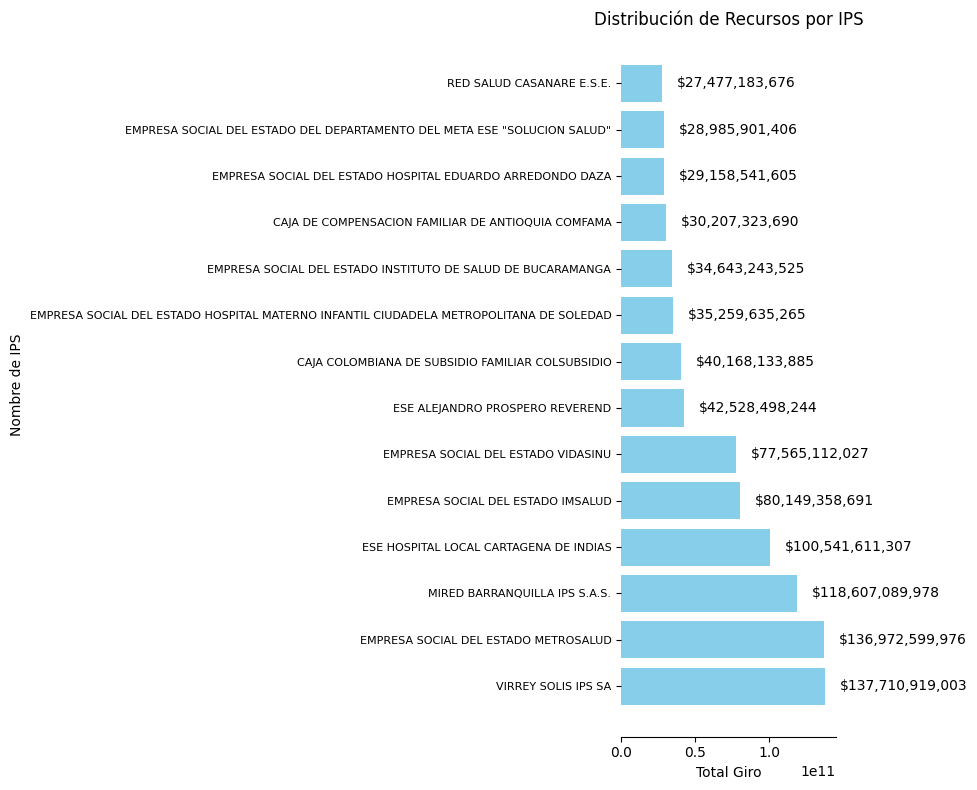

In [ ]:
# URL del endpoint
url = "http://127.0.0.1:8000/api/recursos-totales-por-ips"

# Realiza la solicitud al endpoint
response = requests.get(url)

# Intenta convertir la respuesta a JSON
data = response.json()

# Filtrar datos donde 'nombre_ips' no sea None
valid_data = [item for item in data if item["nombre_ips"] is not None]

# Procesa los datos
ips_names = [item["nombre_ips"] for item in valid_data]
total_giro = [item["total_giro"] for item in valid_data]

# Ordenar los datos por total_giro de mayor a menor
sorted_data = sorted(zip(total_giro, ips_names), reverse=True)
total_giro_sorted, ips_names_sorted = zip(*sorted_data)

# Generación del gráfico de barras horizontales
plt.figure(figsize=(10, 8))
bars = plt.barh(ips_names_sorted, total_giro_sorted, color="skyblue")

# Añadir etiquetas con valores
for bar in bars:
    plt.text(
        bar.get_width() + 10000000000,  
        bar.get_y() + bar.get_height() / 2,  
        f"${bar.get_width():,.0f}",  
        va="center", ha="left", color="black"
    )

plt.xlabel("Total Giro")
plt.ylabel("Nombre de IPS")
plt.title("Distribución de Recursos por IPS")

# Ajustar el estilo para quitar el recuadro
plt.gca().spines['top'].set_visible(False)    
plt.gca().spines['right'].set_visible(False)  
plt.gca().spines['left'].set_visible(False)   


# Ajuste del tamaño de la fuente para los nombres de IPS
plt.yticks(fontsize=8)  

# Rotar las etiquetas para mayor legibilidad
plt.tight_layout()
plt.show()


### **Interpretación del Gráfico:**

El gráfico muestra las **15 IPS que han recibido más recursos**:

- **Insights Clave**:
  - Estas IPS reciben la mayor parte de los recursos, destacando una **distribución desigual**.
  - Hay una concentración de recursos en unas pocas IPS, con montos que superan los **$70 millones**.



In [3]:
# URL del endpoint
url = "http://127.0.0.1:8000/api/distribucion-por-eps-y-ips"

# Realiza la solicitud al endpoint
response = requests.get(url)

# Verifica si la respuesta fue exitosa
if response.status_code == 200:
    try:
        # Intenta convertir la respuesta a JSON
        data = response.json()
        print(data)
    except ValueError:
        print("Error: La respuesta no es un JSON válido")
else:
    print(f"Error: {response.status_code}, Detalles: {response.text}")


[{'nombre_eps': None, 'nombre_ips': None, 'total_giro': 4067155549160.65}, {'nombre_eps': 'AIC', 'nombre_ips': 'ASOCIACIÓN DE CABILDOS INDÍGENAS DE LA ZONA NORTE DEL CAUCA -ACIN.', 'total_giro': 4468890039.0}, {'nombre_eps': 'AIC', 'nombre_ips': 'ASOCIACIÓN DE CABILDOS INDÍGENAS DE LA ZONA NORTE DEL CAUCA -ACIN. ', 'total_giro': 2233213717.0}, {'nombre_eps': 'AIC', 'nombre_ips': 'ASOCIACION DE CABILDOS INDIGENAS DE LA ZONA NORTE DEL CAUCA', 'total_giro': 2233213717.0}, {'nombre_eps': 'AIC', 'nombre_ips': 'ASOCIACION DE AUTORIDADES INDIGENAS DEL ORIENTE CAUCANO', 'total_giro': 1979875614.0}, {'nombre_eps': 'AIC', 'nombre_ips': "ASOCIACION DE CABILDOS UKAWE'SX NASA ÇXHAB IPS-I", 'total_giro': 1832478170.0}, {'nombre_eps': 'AIC', 'nombre_ips': 'ASOCIACIÒN DE AUTORIDADES ANCESTRALES TERRITORIALES NASA CXHA CXHA', 'total_giro': 1698436520.0}, {'nombre_eps': 'AIC', 'nombre_ips': 'EMPRESA SOCIAL DEL ESTADO TIERRADENTRO ESE', 'total_giro': 1434329893.0}, {'nombre_eps': 'AIC', 'nombre_ips': 'CI